### Project 2: EDA on a Dataset with Missing Data
#### Objective: Perform a more realistic EDA that involves identifying and handling missing values.

##### Step 1: Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### Step 2: Load the Titanic dataset from Seaborn

In [2]:
df = sns.load_dataset('titanic')

# Titanic dataset is preloaded in Seaborn.
# It contains details like age, sex, class, embarked port, survival status, etc.
# Some columns have missing data

##### Step 3: Inspect and Find Missing Values

In [4]:
df.isnull().sum()

# Counts how many values are missing in each column.
# see columns like age, deck, and embarked with missing entries


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

##### Step 4: Visualize Missing Values

<Axes: >

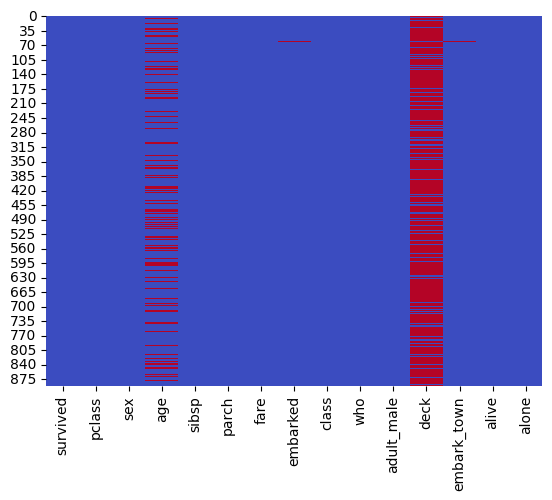

In [5]:
sns.heatmap(df.isnull(), cbar=False, cmap='coolwarm')

# Heatmap shows where missing values occur.
# White spaces = missing data.
# Gives a visual sense of which columns need cleaning

##### Step 5: Handle Missing Data

In [ ]:

# Fill missing values
df['age'] = df['age'].fillna(df['age'].median())
df.drop(columns=['deck'], inplace=True)
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


# After this, df.isnull().sum() should show 0 missing values (or very few)

##### Step 6: Create a New Feature

In [11]:
df['family_size'] = df['sibsp'] + df['parch']
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 0 else 0)

# sibsp: number of siblings/spouses aboard
# parch: number of parents/children aboard
# is_alone = 1 if no family, else 0
# This new feature can be useful for modeling later (e.g., people alone had lower survival chances

##### Step 7 — Visualize Insights

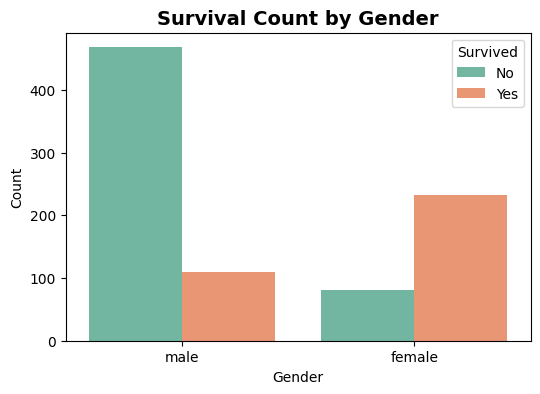

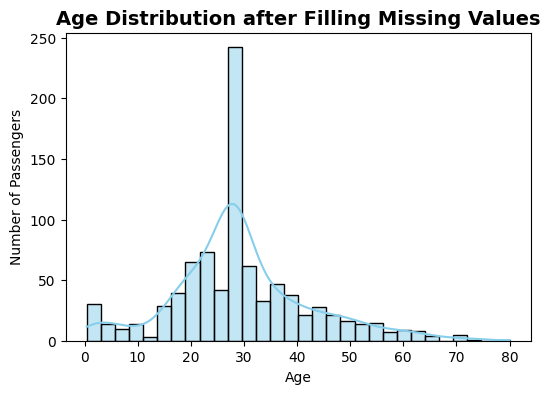

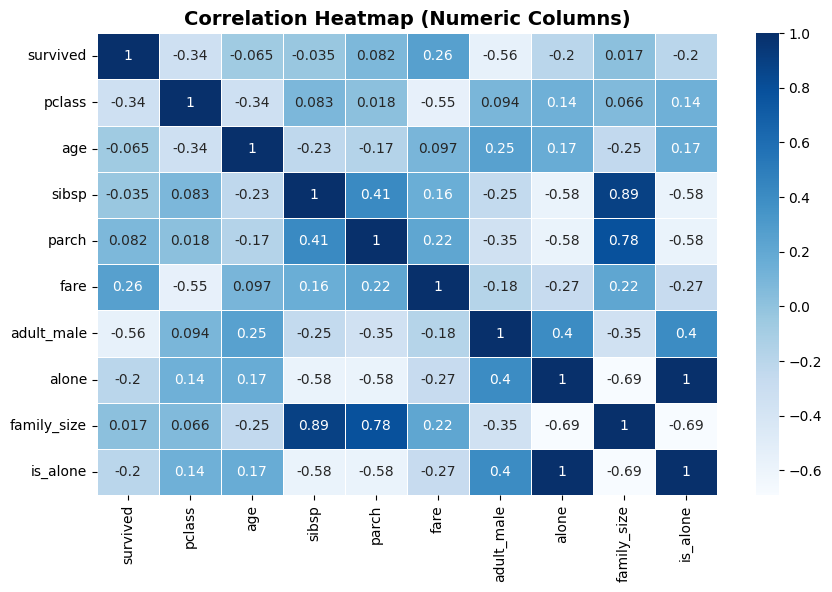

In [12]:
# Survival by Gender → males vs females
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title("Survival Count by Gender", fontsize=14, fontweight='bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# x='sex' → x-axis shows male and female.
# hue='survived' → separates each bar into survived (1) vs not survived (0).
# clearly see that more females survived than males

# Age Distribution → after filling missing values
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution after Filling Missing Values", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

# sns.histplot() → creates a histogram showing how passenger ages are spread.
# kde=True → adds a smooth curve showing the distribution.
# Since already filled missing ages with the median, you’ll see a smooth, complete distribution without gaps.

# Correlation Heatmap → to see numeric relationships (like age vs fare vs survived)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Columns)", fontsize=14, fontweight='bold')
plt.show()

# df.corr() → calculates correlation between numeric columns only.
# annot=True → shows the correlation values inside the boxes.
# cmap='Blues' → gives a nice blue gradient.
# see which features are related — for example,
# fare vs pclass (negative correlation),
# survived vs sex (strong relationship — females had higher survival)